# Final Project - Dectecting Glasses on People Using Neuroevolution (jk)


**Team:** Jorge Garcia, Carlos Valdez


In [1]:
from deap import algorithms, base, creator, tools 
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import math
#import multiprocessing
digits = datasets.load_digits()

bestAccuracy = 0
bestWeights = np.empty(shape = [0, 0])

def evaluateIndividual(individual):
    global bestAccuracy
    global bestWeights
    weights1 = vectorizeWeights(individual, 65, 20)
    weights2 = vectorizeWeights(individual, 21, 10)
    # Arbitrarily chose zero for the starting fitness.
    numCorrect = 0 
    for i in range (0, 1500):
        digitImages = digits.images[i]
        inputs = vectorizeInputs(digitImages, 1, 65)
        netInput = np.dot(inputs, weights1) 
        activationValues = activation(netInput)
        activationValues = addBias(activationValues)
        netInput2 = np.dot(activationValues, weights2)
        output = activation(netInput2)
        guess = findGuess(output)
        target = digits.target[i]
        numCorrect = numCorrect + calcCorrectGuess(guess, target) 
    accuracy = numCorrect / 1700.0
    if (accuracy > bestAccuracy):
         bestAccuracy = accuracy
         bestWeights = individual
         print "Accuracy" + str(accuracy)
    return accuracy,
        
# Gets the first 1300 vlaues in the individual and makes a 
# 65 x 20 2D numpy array to be able to do matrix multiplication 
# with the inputs.
def vectorizeWeights(individual, row, col):
    weights = np.empty(shape = [row, col])
    index = 0
    for r in range (0, row):
        for c in range (0, col):
            weights[r][c] = individual[index]
            index = index + 1
    return weights
    
# Puts the inputs in a 1 x 65 2D numpy array to be able to do 
# matrix multiplication with the first set of weights.
def vectorizeInputs(digitImages, row, col):
    # Gets dimensions of the 2D array representing the image.
    # Should be a 8 x 8 2D array that represents the grayscale
    # values from 0 to 16.
    dimensions = digitImages.shape 
    inputs = np.empty(shape = [row, col])
    index = 0
    for r in range (0, dimensions[0]):
        for c in range (0, dimensions[1]):
            inputs[row - 1][index] = digitImages[r][c]
            index = index + 1
    # Adds bias.
    inputs[row - 1][col - 1] = 1
    return inputs

# Performs the activation on the net input.
# The sigmoid funtion is used.
# Sigmoid formula: 1 / (1 + np.exp(-x))  
def activation(netInput):
    dimensions = netInput.shape
    activationValues = np.empty(shape = [dimensions[0], dimensions[1]])
    for r in range (0, dimensions[0]):
        for c in range (0, dimensions[1]):
            activationValues[r][c] = 1 / (1 + np.exp(-netInput[r][c]))      
    return activationValues   

# Adds the bias to the activation values for the hidden layer.
# A new 2D array is made that is bigger by one.
# The values are copied over and the last value is set to 1.
def addBias(activationValues):
    dimensions = activationValues.shape
    actValuesWithBias = np.empty(shape = [dimensions[0], dimensions[1] + 1] )
    # Copies the values from the 2D array containing the activation values
    # onto the new array.
    for r in range (0, dimensions[0]):
        for c in range (0, dimensions[1]):
            actValuesWithBias[r][c] = activationValues[r][c]
    # Adds bias
    actValuesWithBias[dimensions[0] - 1][dimensions[1] - 1] = 1
    return actValuesWithBias

# Finds the guess our neural network on what number it thinks the
# image represents. The output is a 1 x 10 2D array and every index 
# corresponds to a number. The index with the highest number represents 
# the guess our neural network made.
def findGuess(output):
    dimensions = output.shape
    highestGuess = output[0][0]
    highestIndex = 1
    for r in range (0, dimensions[0]):
        for c in range (0, dimensions[1]):
            if (output[r][c] > highestGuess):
                highestGuess = output[r][c]
                highestIndex = c
    return highestIndex

# Calculates the fitness for the individual
def calcCorrectGuess(guess, target):
    result = 0
    if (guess == target):
         result = 1
    return result

def evaluateBestIndividual(individual):
    weights1 = vectorizeWeights(individual, 65, 20)
    weights2 = vectorizeWeights(individual, 21, 10)
    numCorrect = 0 
    for i in range (1200, 1700):
        digitImages = digits.images[i]
        inputs = vectorizeInputs(digitImages, 1, 65)
        netInput = np.dot(inputs, weights1)
        activationValues = activation(netInput)
        activationValues = addBias(activationValues)
        netInput2 = np.dot(activationValues, weights2)
        output = activation(netInput2)
        guess = findGuess(output)
        target = digits.target[i]
        numCorrect = numCorrect + calcCorrectGuess(guess, target) 
    accuracy = numCorrect / 500.0
    print "Accuracy of Best Individual " + str(accuracy)
    
    
creator.create("FitnessMax", base.Fitness, weights = (1.0,))
creator.create("Individual", list, fitness = creator.FitnessMax)

toolbox = base.Toolbox()
#pool = multiprocessing.Pool()
toolbox.register("attr_real", np.random.rand)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, n = 1510)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, n = 300)
toolbox.register("evaluate", evaluateIndividual)
toolbox.register("mate", tools.cxBlend, alpha = 1.0)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.2, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)
#toolbox.register("map", pool.map)

CXPB, MUTPB, NGEN = 0.5, 0.2, 1

pop = toolbox.population()
pop = algorithms.eaSimple(pop, toolbox, CXPB, MUTPB, NGEN) 
#bestIndividual = tools.selBest(pop[0], 1)
#print "Best Individual" + str(bestIndividual)
print "Best Accuracy" + str(bestAccuracy)
print "Best Weights" + str(bestWeights)
evaluateBestIndividual(bestWeights)

Accuracy0.0876470588235
Accuracy0.0888235294118
Accuracy0.0894117647059
Accuracy0.09
gen	nevals
0  	300   
1  	177   
Best Accuracy0.09
Best Weights[0.19316010826016738, 0.9311662888425202, 0.9179975345621307, 0.6562119693083893, 0.9135815073575712, 0.14577403840694791, 0.0936203207589339, 0.13824245725514206, 0.0081152968313426, 0.5811195589759942, 0.9437599331478977, 0.4179992242032624, 0.425153362170384, 0.40123484449039404, 0.9319670184971031, 0.8247754476916535, 0.6854019922122946, 0.5475846094927861, 0.6456338158008301, 0.5435710444866164, 0.8987793159352944, 0.3549531388890601, 0.18454161647609202, 0.03800232788643909, 0.8929405367479325, 0.16046625549317817, 0.816665658496219, 0.6654192835333053, 0.8437328528417168, 0.7691382859926402, 0.2568653309610307, 0.04697197682545906, 0.12482819572372172, 0.9661926461980358, 0.289714545593044, 0.569486924164872, 0.5743357432888375, 0.42641680310644114, 0.6563926965262413, 0.5068005715438864, 0.8995489476963408, 0.8571527705957193, 0.816

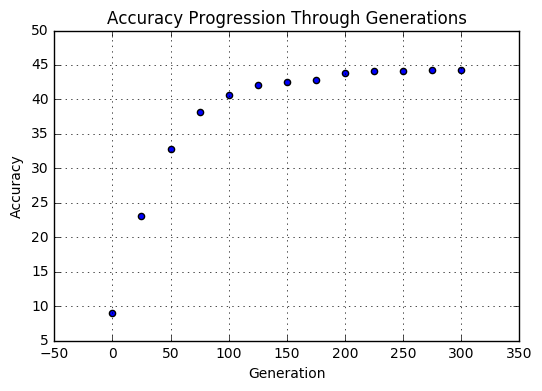

In [56]:
# code for fitness graph
import matplotlib.pyplot as plt 
import numpy as np
accuracies = [0.09, 0.231176470588, 0.327647058824, 0.381764705882, 0.405882352941, 0.420588235294, 0.425882352941, 0.428235294118, 0.438235294118, 0.440588235294, 0.440588235294, 0.442941176471, 0.442941176471]
x = 0
for i in range (0, len(accuracies)):
    plt.scatter(x, accuracies[i] * 100)
    x = x + 25
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.title('Accuracy Progression Through Generations')
plt.show()
# Accuracy of Best Individual: 47.8